# Gradient Boosting regression

In [ ]:
%matplotlib inline

In [2]:
import math
import pickle

import numpy as np

In [46]:
clf = pickle.load(open('boston_fitted_gbregr.pkl', 'rb'))
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
params = clf.get_params()

In [164]:
import matplotlib.pyplot as plt

In [44]:
feature_importance = clf.feature_importances_
if len(feature_names) != feature_importance.shape[0]:
    raise ValueError("The passed feature_names is not valid. The order \
                      of the feature_names should match indices of the \
                      data the model was trained on.")
n_features = feature_importance.shape[0]

In [161]:
# Set parameters for plotting here
n_features_to_display = 13

max_per_plot = 10
# limit to 10 features per plot and 3 plots per row
n_ax_cols = min(3, math.ceil(n_features_to_display / max_per_plot))
n_ax_rows = math.ceil(n_features_to_display / max_per_plot / n_ax_cols)

# Variable Importance

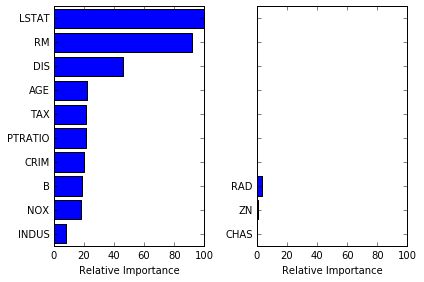

In [162]:
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1][:n_features_to_display]
pos = np.arange(max_per_plot) + .5
fig, (all_axes) = plt.subplots(n_ax_rows, n_ax_cols)

if not isinstance(all_axes, np.ndarray):
    all_axes = np.array([all_axes])

for ax_ind, ax in enumerate(all_axes):
    start_ind = ax_ind * max_per_plot
    end_ind = min(start_ind + max_per_plot, n_features_to_display)
    feature_inds = sorted_idx[start_ind:end_ind][::-1]
    amount_to_fill = max_per_plot - len(feature_inds)
    
    features_to_plot = feature_importance[feature_inds]
    if amount_to_fill > 0:
        features_to_plot = \
            np.append(features_to_plot, np.zeros(amount_to_fill))
        

    ax.barh(pos, features_to_plot, align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(feature_names[feature_inds])
    ax.set_xticks(np.linspace(0, 100, 6))
    ax.set_xlabel('Relative Importance')

fig.tight_layout()
plt.show()